In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('bse_data.csv')


# Data Cleaning //Preprocessing
# 1.Empty cells 2.Wrong format 3.wrong data 4.Duplicates   5.Outliers

# Check for duplicates
print('Duplicates: ', data.duplicated().sum())


Duplicates:  0


In [9]:
# check for missing values
print('Missing values: \n', data.isnull().sum())


Missing values: 
 number_siblings     0
name                0
gender              0
age                 0
living_allowance    7
have_bf_gf          0
profession          0
daily_meals         0
dtype: int64


In [10]:
# Check for wrong format
print('Wrong format: ', data.dtypes)


Wrong format:  number_siblings      int64
name                object
gender              object
age                  int64
living_allowance    object
have_bf_gf           int64
profession          object
daily_meals          int64
dtype: object


In [11]:
# NB : for NAn values you can make them empty and then use the fillna() function to fill them with the mean or median of the column

# check for wrong data
print(data['have_bf_gf'].unique())

[1 0]


In [12]:
# Remove comma (",")  and convert to float
data['living_allowance'] = data['living_allowance'].astype(str).str.replace(',', '').astype(float)

# Replace the cells with missing values with the mean of the column
data['living_allowance'] = data['living_allowance'].fillna(data['living_allowance'].mean())

# Replace the cells with missing values with the median of the column
# data['living_allowance'] = data['living_allowance'].fillna(data['living_allowance'].median())


print(data.head())

   number_siblings                   name  gender  age  living_allowance  \
0                1     Nakasujja Gertrude  female   33     377310.344828   
1                3  Arinda Asiimwe Atweta  female   23      50000.000000   
2                4    Ndjekornom Victoire    male   23      25000.000000   
3                0         KATURAMU EDGAR    male   27     500000.000000   
4                4      Abinsinguza Lasse    male   24     100000.000000   

   have_bf_gf                profession  daily_meals  
0           1            Data Scientist            2  
1           1  Machine Learning Enginer            1  
2           0            Data Scientist            1  
3           0  Machine Learning Enginer            2  
4           1            Data Scientist            2  


In [13]:
# Dealing with outliers
# Need to first undersatnd the data distribution 


# Explanatory DAta Analysis (EDA)
# Summary statistics
print(data.describe())

       number_siblings        age  living_allowance  have_bf_gf  daily_meals
count        36.000000  36.000000      3.600000e+01   36.000000    36.000000
mean          3.888889  24.055556      3.773103e+05    0.333333     2.277778
std           2.504599   2.936903      4.443141e+05    0.478091     0.701472
min           0.000000  20.000000      2.000000e+03    0.000000     1.000000
25%           2.000000  22.750000      1.425000e+05    0.000000     2.000000
50%           4.000000  23.000000      2.800000e+05    0.000000     2.000000
75%           5.000000  24.000000      4.079828e+05    1.000000     3.000000
max           9.000000  33.000000      2.500000e+06    1.000000     3.000000


In [14]:
# Distribution of gf and bf count
# sns.countplot(data['have_bf_gf'])
print(data['have_bf_gf'].value_counts())

have_bf_gf
0    24
1    12
Name: count, dtype: int64


In [15]:
# Dstribution of daoly meals
# sns.distplot(data['daily_meals'])
# plt.hist(data['daily_meals'], bins=10)
print(data['daily_meals'].value_counts())

daily_meals
2    16
3    15
1     5
Name: count, dtype: int64


In [16]:
# Distribution of number of siblings
# sns.distplot(data['siblings'])
# plt.hist(data['siblings'], bins=10)
print(data['number_siblings'].value_counts())

number_siblings
4    8
1    5
2    5
3    4
5    4
8    3
0    2
6    2
9    2
7    1
Name: count, dtype: int64


In [17]:
# Distribution of profession
# sns.countplot(data['profession'])
print(data['profession'].value_counts())

profession
Data Scientist              19
Machine Learning Enginer    10
Data Analyst                 7
Name: count, dtype: int64


In [18]:
# Male and female 
# sns.count
print(data["gender"].value_counts())

gender
male      24
female    12
Name: count, dtype: int64


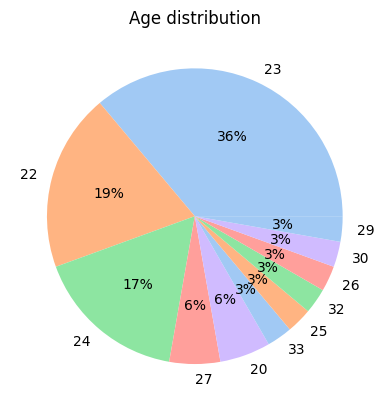

In [19]:
# Data Visualization helps to gain/uncover insights from the data

import seaborn as sns

# Age distribution Using pie chart

colors = sns.color_palette('pastel')[0:5]
plt.pie(data['age'].value_counts(), labels=data['age'].value_counts().index, colors=colors, autopct='%.0f%%')
plt.title('Age distribution')
plt.show()

In [20]:

data2 = pd.read_csv('crop.csv')

print(data2.describe())

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


In [21]:
print(data2.head(20))


     N   P   K  temperature   humidity        ph    rainfall label
0   90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1   85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2   60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3   74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4   78  42  42    20.130175  81.604873  7.628473  262.717340  rice
5   69  37  42    23.058049  83.370118  7.073454  251.055000  rice
6   69  55  38    22.708838  82.639414  5.700806  271.324860  rice
7   94  53  40    20.277744  82.894086  5.718627  241.974195  rice
8   89  54  38    24.515881  83.535216  6.685346  230.446236  rice
9   68  58  38    23.223974  83.033227  6.336254  221.209196  rice
10  91  53  40    26.527235  81.417538  5.386168  264.614870  rice
11  90  46  42    23.978982  81.450616  7.502834  250.083234  rice
12  78  58  44    26.800796  80.886848  5.108682  284.436457  rice
13  93  56  36    24.014976  82.056872  6.984354  185.277339  

<Axes: >

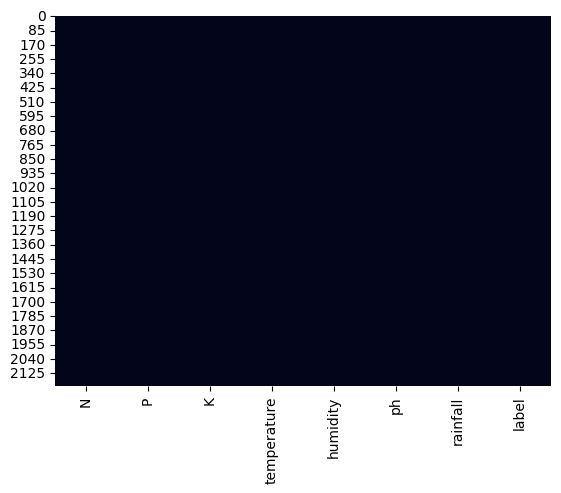

In [22]:
# Checking for null/missing values with heatmap
sns.heatmap(data2.isnull(), cbar=False)

<Axes: >

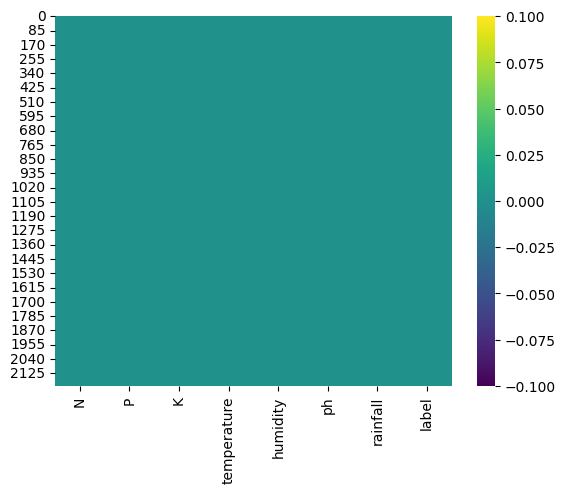

In [23]:
# method 2
# N = Nitrogen
# P = Potassium

sns.heatmap(data2.isnull(), cbar=True, cmap='viridis')


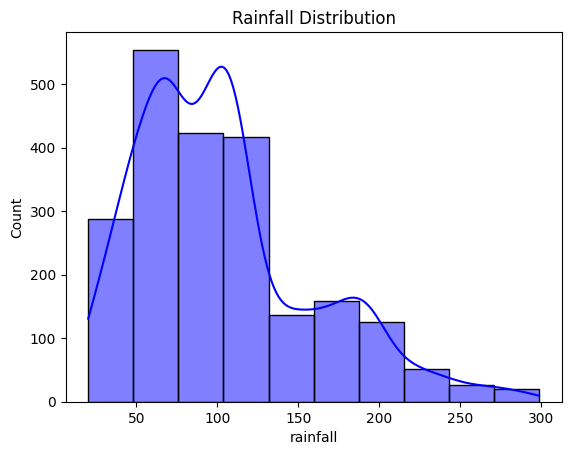

In [24]:
# Rainfall Distribution
sns.histplot(data2['rainfall'], color="blue", bins=10, kde=True)
plt.title('Rainfall Distribution')
plt.show()

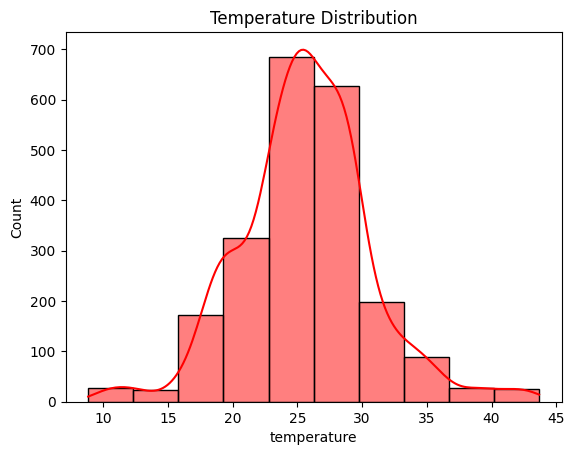

In [25]:
# Temperature Distribution
sns.histplot(data2['temperature'],color="red", bins=10, kde=True)
plt.title('Temperature Distribution')
plt.show()

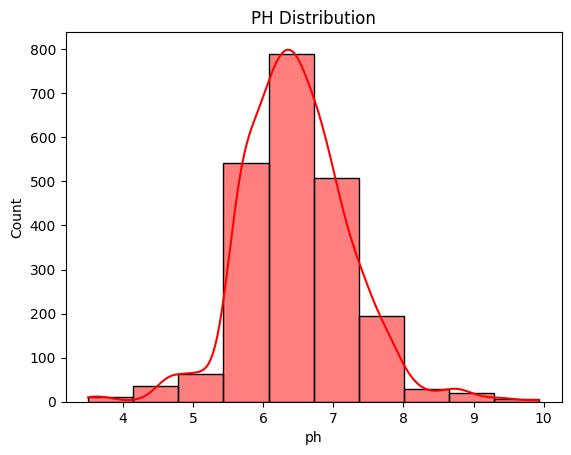

In [26]:
# PH Distribution
sns.histplot(data2['ph'],color="red", bins=10, kde=True)
plt.title('PH Distribution')
plt.show()

/var/folders/h6/rzybbwp521d9hc1hhs2q__fr0000gn/T/ipykernel_59277/415836953.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="label", x='ph', data=data2, palette='plasma_r')


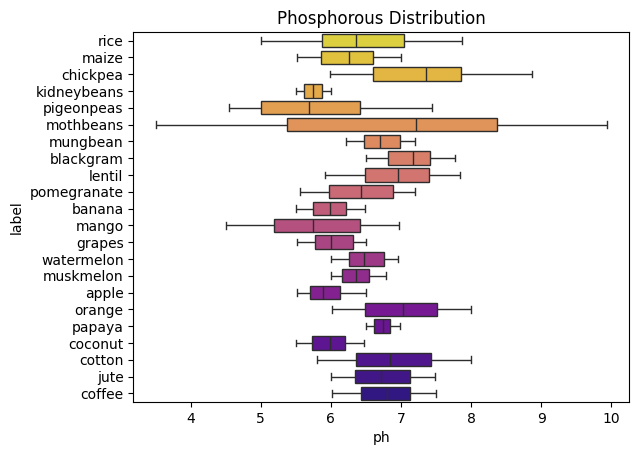

In [27]:
# Phosphorous Distribution
sns.boxplot(y="label", x='ph', data=data2, palette='plasma_r')
plt.title('Phosphorous Distribution')
plt.show()


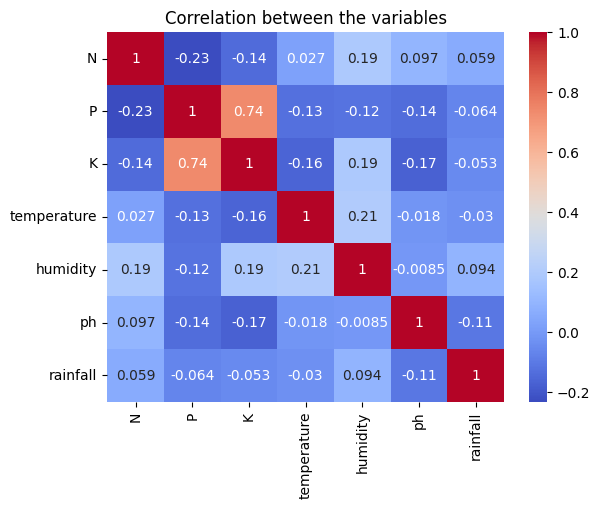

In [28]:
# Visualisation correlation between the variables

c=data2.label.astype('category')
# targets = dict(enumerate(c.cat.categories))
data2['target'] = c.cat.codes

y=data2.target
x=data2[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]

sns.heatmap(x.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between the variables')
plt.show()





In [29]:
import pandas as pd
dd = pd.read_csv('crop2.csv')
print(dd.head(10))

   N     P     K     temperature          humidity             \
0    90    42    43            20.879744            82.002744   
1    85    58    41            21.770462            80.319644   
2    60    55    44            23.004459            82.320763   
3    74    35    40            26.491096            80.158363   
4    78    42    42            20.130175            81.604873   
5    69    37    42            23.058049            83.370118   
6    69    55    38            22.708838            82.639414   
7    94    53    40            20.277744            82.894086   
8    89    54    38            24.515881            83.535216   
9    68    58    38            23.223974            83.033227   

   ph                   rainfall              label         target  
0             6.502985            202.935536  rice              20  
1             7.038096            226.655537  rice              20  
2             7.840207            263.964248  rice              20  
3       

In [30]:
# Data Preprocessing 
# for machine learning model
# Correlation



# Machine Learning Models, set train and test data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

x = data2[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = data2['label']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)



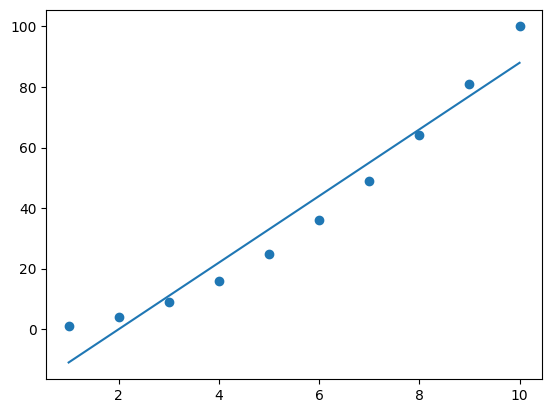

In [31]:
from scipy import  stats

# Exercise plot polynormial regression
x=[1,2,3,4,5,6,7,8,9,10]
y=[1,4,9,16,25,36,49,64,81,100]

slope,intercept,r,p,std_err = stats.linregress(x,y) 

def myfunc(x):
    return slope*x+intercept

mymodel = list(map(myfunc,x))


plt.scatter(x,y)
plt.plot(x,mymodel)
plt.show()

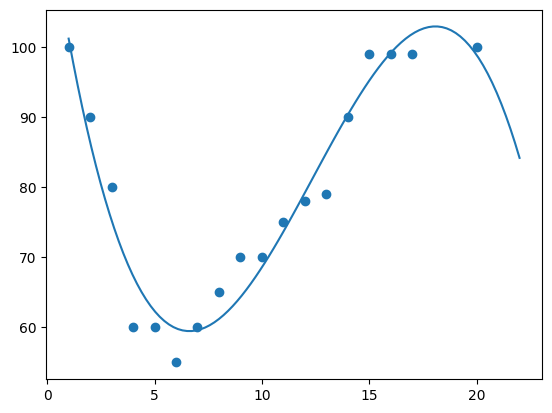

In [34]:
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,20]
y=[100,90,80,60,60,55,60,65,70,70,75,78,79,90,99,99,99,100]

mymodel=np.poly1d(np.polyfit(x,y,3))
myline = np.linspace(1,22,100)

plt.scatter(x,y)
plt.plot(myline,mymodel(myline))
plt.show()